<a href="https://colab.research.google.com/github/michaelfarayola7/Data-Science-ML-Projects/blob/main/Flight_Price_Prediction_Heroku_Cloud_Deployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install chart_studio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot, iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [2]:
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel('/content/Data_Train.xlsx')

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


Automated EDA

In [5]:
!pip install pandas-profiling


In [6]:
import pandas_profiling as pf

<ipython-input-6-39afa9e70ee4>:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [7]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Manuel EDA

In [8]:
df.shape

(10683, 11)

In [9]:
df.dtypes #checking the data types

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
df.isna().sum() #Checking null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## **Feature Engineering**

Let's convert **Date_of_Journey** to its appropriate format as **datetime** with regards to **day** and **month**

In [12]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


### **Date_of_Journey**

In [13]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y")

In [14]:
df['Day_of_Journey'] = df['Date_of_Journey'].dt.day

In [15]:
df['Month_of_Journey'] = df['Date_of_Journey'].dt.month

In [16]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [17]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

Let's do the same for the other relative columns

### **Dep_Time**

In [18]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

In [19]:
df['Dep_hr'] = df['Dep_Time'].dt.hour
df['Dep_min'] = df['Dep_Time'].dt.minute

In [20]:
df.drop(['Dep_Time'], axis = 1, inplace = True)

### **Arrival_Time**

In [21]:
df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'])

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-08-15 13:15:00,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2023-08-15 23:30:00,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2023-08-15 21:35:00,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
df['Arrival_hr'] = df['Arrival_Time'].dt.hour
df['Arrival_min'] = df['Arrival_Time'].dt.minute

In [24]:
df.drop(['Arrival_Time'], axis = 1, inplace = True)

### **Duration Time**

In [25]:
duration=df['Duration'].str.split(' ',expand=True) #split duration datapoints based on space ' '

In [26]:
duration

,0,1
0,2h,50m
1,7h,25m
2,19h,None
3,5h,25m
4,4h,45m
...,...,...
10678,2h,30m
10679,2h,35m
10680,3h,None
10681,2h,40m


In [27]:
duration[1].fillna('00m',inplace=True)   #fill all "NAN" with '00m'

In [28]:
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [29]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [30]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


### **Visualization**

In [31]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)

### **Count of Airlines**

In [32]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

### **Airline Vs Price**

[]

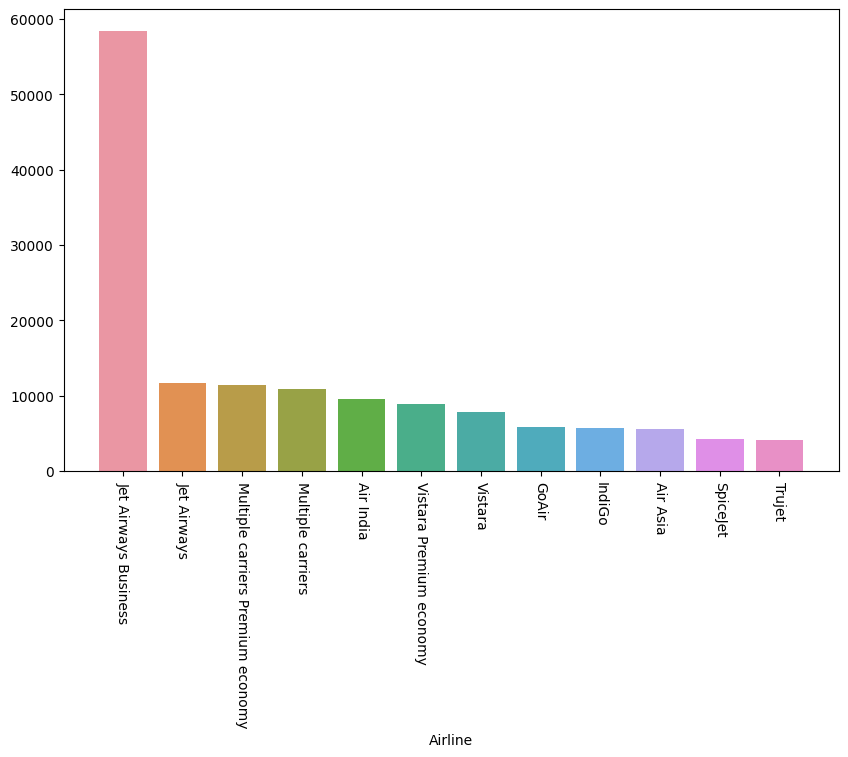

In [33]:
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x = Airprices.index,y = Airprices.values)
plt.xticks(rotation=270)
plt.plot()

In [34]:
df.groupby('Airline')['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

**Jet Airways Business has the highest price with Trujet having the lowest**

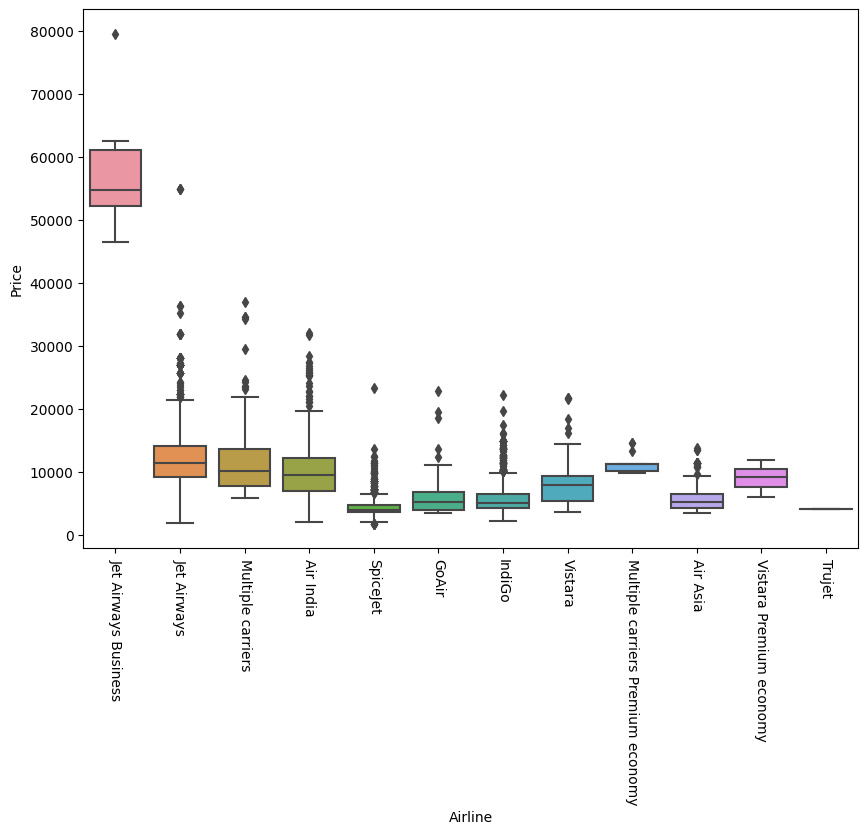

In [35]:
plt.figure(figsize=(10,7))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.xticks(rotation=270)
plt.show()

**Price Based on Number of Stops**

In [36]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

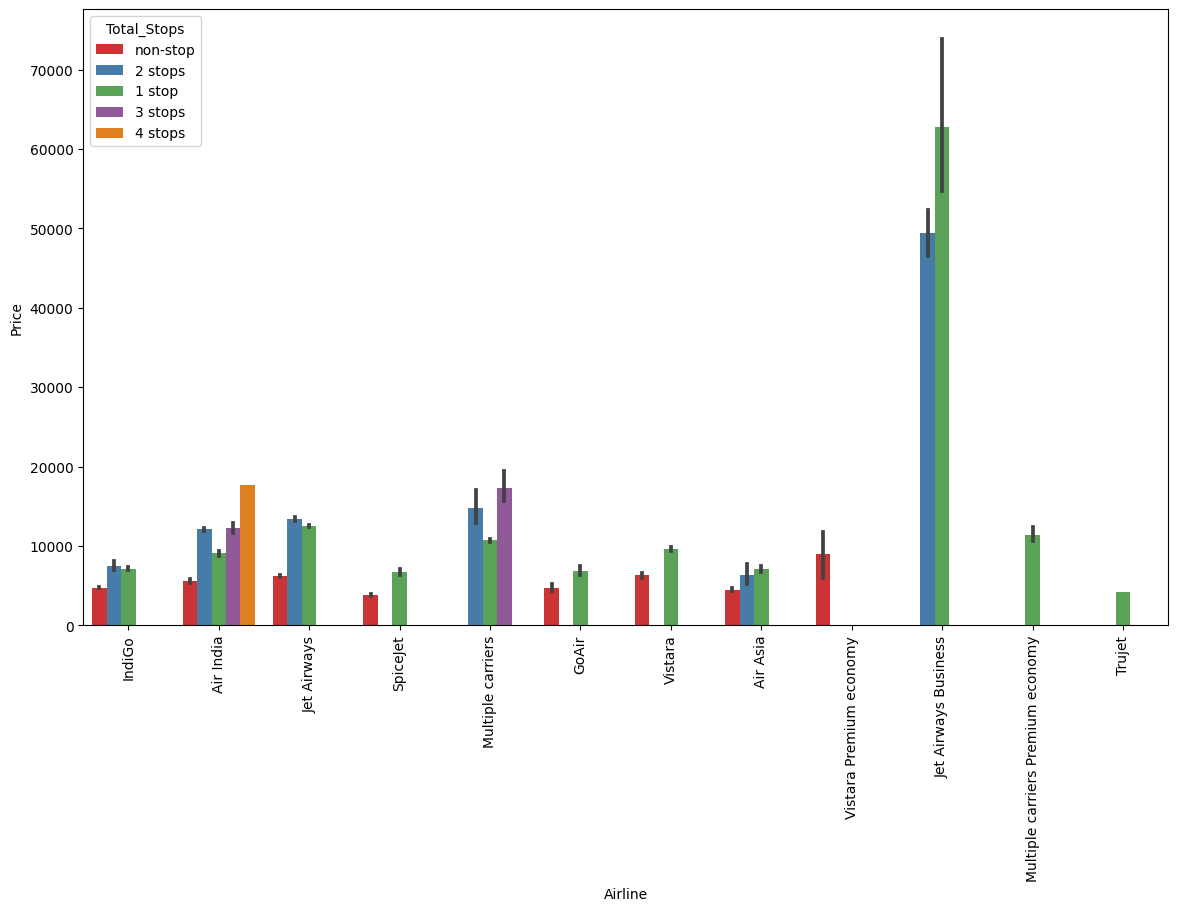

In [37]:
plt.figure(figsize=(14,8))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

**One stop and two stpos Jet Airways Business is having the highest price**

In [38]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

### **Source vs Price**

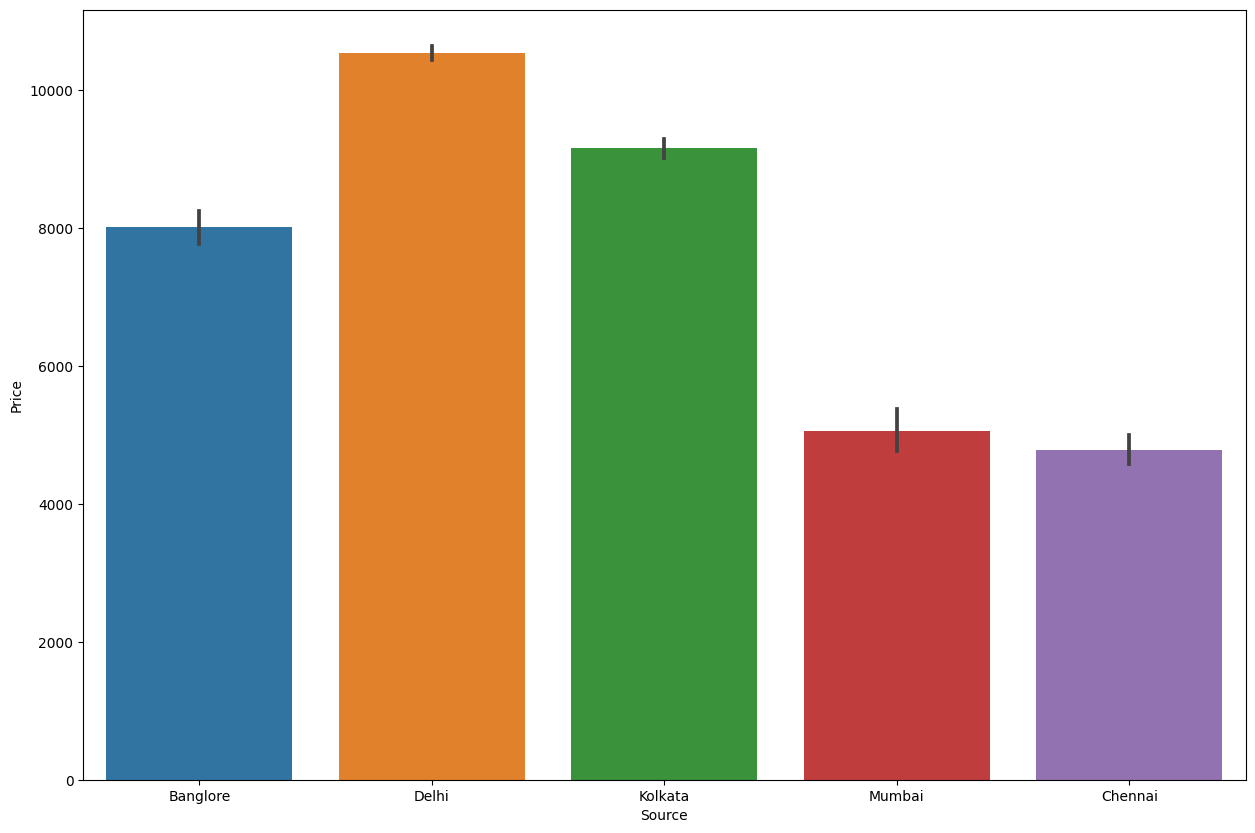

In [39]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

### **Destination vs Price**

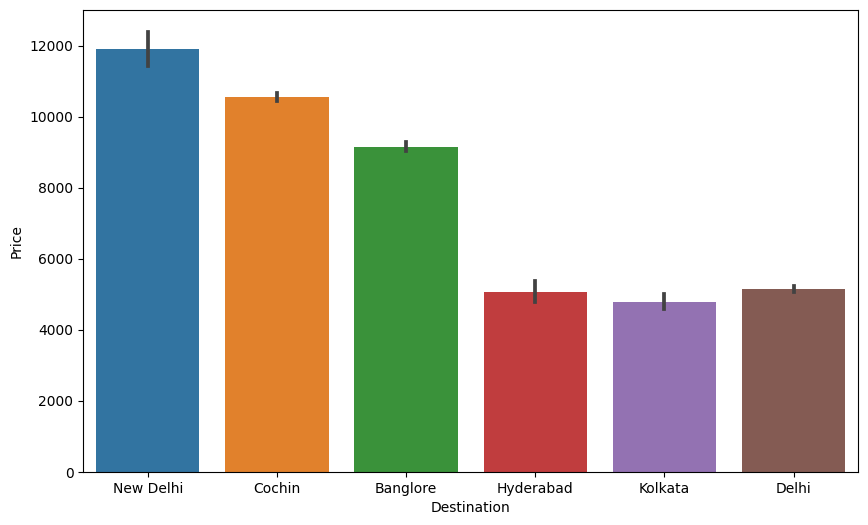

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

In [41]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [42]:
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [43]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

<function matplotlib.pyplot.show(close=None, block=None)>

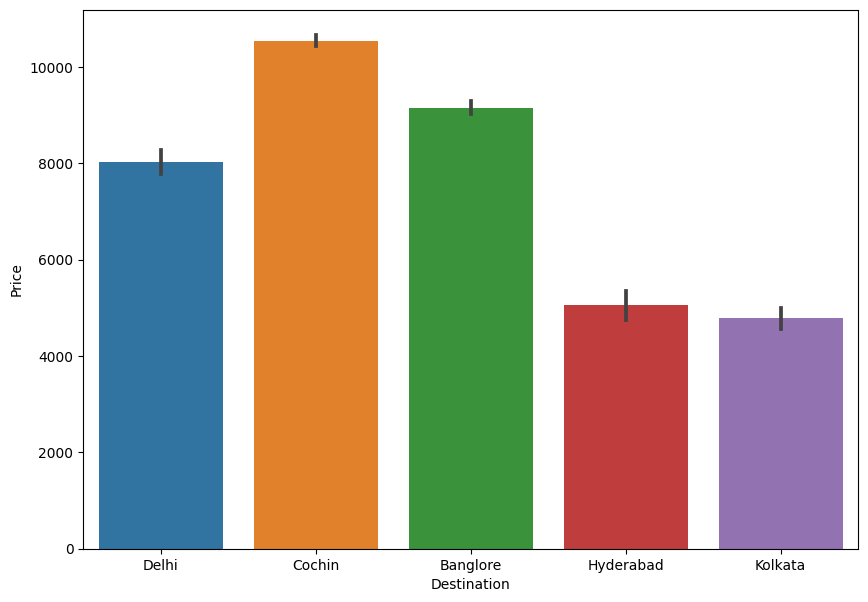

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [45]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<ipython-input-46-2ba58099d8fd>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

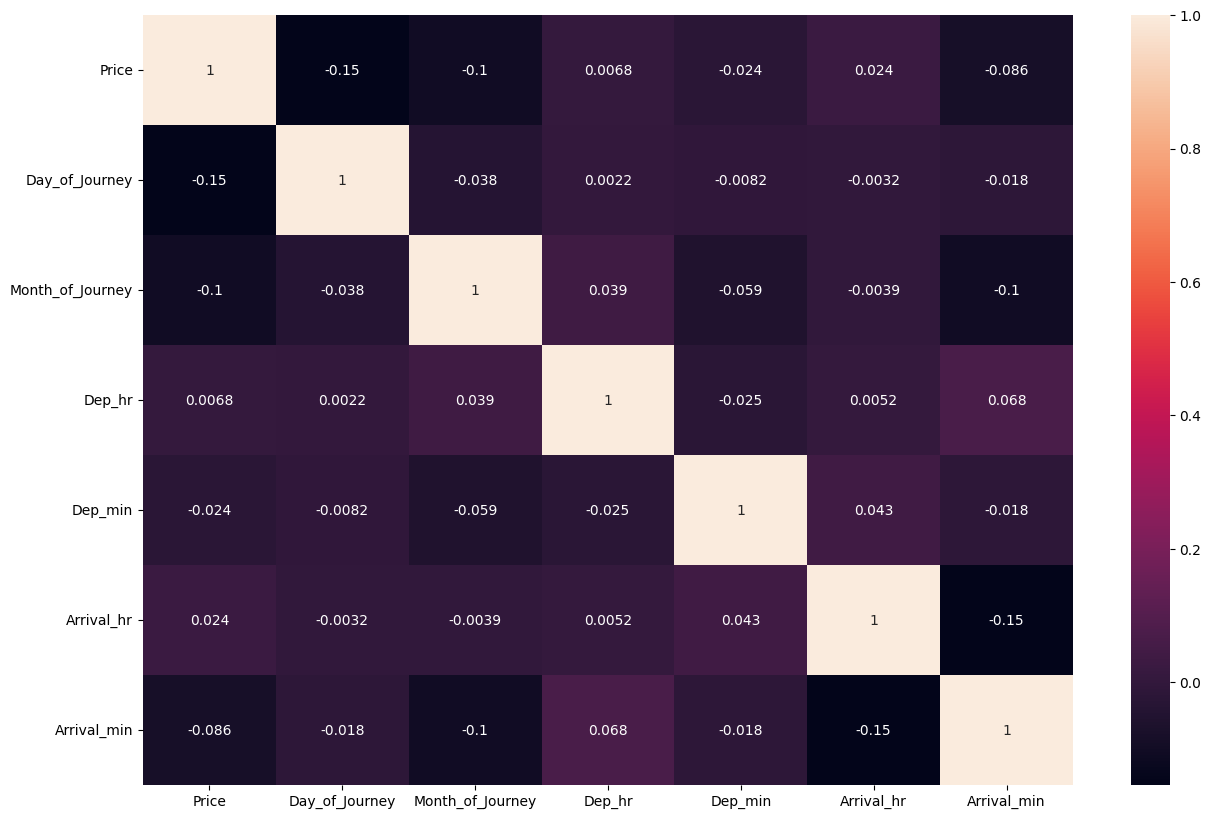

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

**The features are less correlated which is a good thing for us to avoid Multicollinearity**

### **Apply Onehot Encoding on the categorical variables**

In [47]:
#Handling Categorical Values
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})
air_dummy=pd.get_dummies(df['Airline'],drop_first=True)


source_dest_dummy=pd.get_dummies(df[['Source','Destination']],drop_first=True)
df=pd.concat([air_dummy,source_dest_dummy,df],axis=1)

In [48]:
print(df['Source'].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [49]:
print(df['Destination'].value_counts())

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [50]:
df.drop(['Airline','Source','Destination'],inplace=True,axis=1)

In [51]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [52]:
df.shape

(10682, 31)

# **Test Data**

In [53]:
df_test=pd.read_excel("Test_set.xlsx")

In [54]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Let's Perform that same steps as we did for train data earlier**

In [55]:
df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'], format = '%d/%m/%Y')
df_test['Day_of_Journey']=(df_test['Date_of_Journey']).dt.day
df_test['Month_of_Journey']=(df_test['Date_of_Journey']).dt.month

#Dep_time
df_test['Dep_hr']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_min']=pd.to_datetime(df_test['Dep_Time']).dt.minute

#Arrival_time
df_test['Arrival_hr']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_min']=pd.to_datetime(df_test['Arrival_Time']).dt.minute

#Splitting duration  time

a=df_test['Duration'].str.split(' ',expand=True)
a[1].fillna('00m',inplace=True)
df_test['dur_hr']=a[0].apply(lambda x: x[:-1])
df_test['dur_min']=a[1].apply(lambda x: x[:-1])

#dropping the data
df_test.drop(['Date_of_Journey','Duration','Arrival_Time','Dep_Time'],inplace=True,axis=1)

#Handling Categorical Values
df_test['Total_Stops']=df_test['Total_Stops'].map({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4})

air_dummy=pd.get_dummies(df_test['Airline'],drop_first=True)
source_dest_dummy=pd.get_dummies(df_test[['Source','Destination']],drop_first=True)
df_test=pd.concat([air_dummy,source_dest_dummy,df_test],axis=1)

In [56]:
df_test.drop(['Airline','Source','Destination','Additional_Info',"Route"],inplace=True,axis=1)

In [57]:
print('train_shape',df.shape)
print('test_shape',df_test.shape)

train_shape (10682, 31)
test_shape (2671, 28)


In [58]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [59]:
x=df.drop(['Route', 'Price','Additional_Info'],axis=1)
y=df['Price']

In [60]:
x.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Destination_Kolkata,Total_Stops,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,0,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,9,25,4,25,19,00


# **Model Building and Hyperparameter Tuning**

### **ExtraTreesRegressor**

In [61]:
from sklearn.ensemble import ExtraTreesRegressor
ET_Model=ExtraTreesRegressor()
ET_Model.fit(x,y)

ExtraTreesRegressor()

### **Feature Importance**

<Axes: >

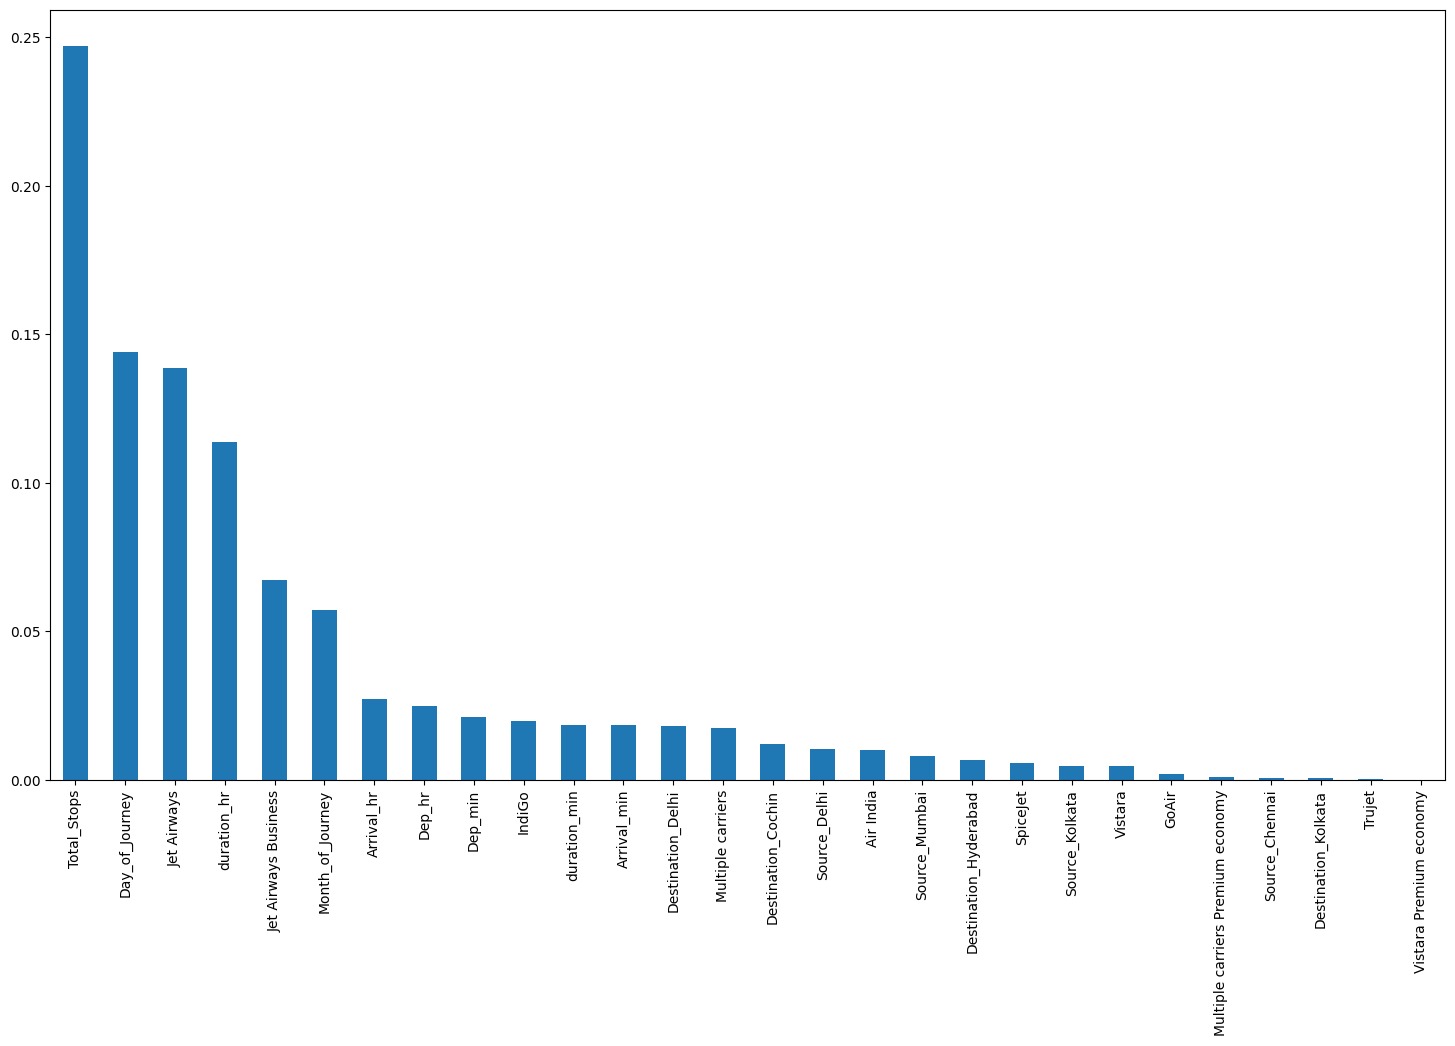

In [62]:
pd.Series(ET_Model.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(18,10))

In [63]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 50)

In [64]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(X_train,y_train)
y_predict=ET_Model.predict(X_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.7686876116168455

### **Random Forest Regressor**

In [65]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor()
RF_Model.fit(X_train,y_train)
y_predict=RF_Model.predict(X_test)
r2_score(y_test,y_predict)

0.7988929676586226

### **Hyperparameter Tuning**

In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
n_estimators = [int(x) for x in np.linspace(start = 80, stop = 150, num = 10)]
max_features = [1.0, 'sqrt']
max_depth = [int(x) for x in np.linspace(6, 45, num = 5)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

# create random grid

rand_grid={'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf=RandomForestRegressor()

rCV=RandomizedSearchCV(estimator=rf, param_distributions=rand_grid, scoring='neg_mean_squared_error', n_iter=10, cv=3, random_state=42, n_jobs = 1)

In [68]:
rCV.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [6, 15, 25, 35, 45],
                                        'max_features': [1.0, 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [80, 87, 95, 103, 111,
                                                         118, 126, 134, 142,
                                                         150]},
                   random_state=42, scoring='neg_mean_squared_error')

In [69]:
rf_pred=rCV.predict(X_test)
rf_pred

array([12339.83993655,  4298.68324631,  6255.8322176 , ...,
       11288.30414501, 10495.94924719,  8884.37447169])

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE',mean_absolute_error(y_test,rf_pred))
print('MSE',mean_squared_error(y_test,rf_pred))

MAE 1160.352867141289
MSE 3802835.5617480665


In [71]:
r2_score(y_test,rf_pred)

0.8148000549367467

In [72]:
!pip install catboost

In [73]:
from catboost import CatBoostRegressor

cat=CatBoostRegressor()
cat.fit(X_train,y_train)

Learning rate set to 0.057463
0:	learn: 4496.0523487	total: 48.2ms	remaining: 48.1s
1:	learn: 4369.0922944	total: 50.6ms	remaining: 25.2s
2:	learn: 4222.9149833	total: 52.5ms	remaining: 17.4s
3:	learn: 4094.5526402	total: 54.3ms	remaining: 13.5s
4:	learn: 3998.8191754	total: 56.5ms	remaining: 11.2s
5:	learn: 3885.0374172	total: 59.2ms	remaining: 9.8s
6:	learn: 3788.6739639	total: 61.2ms	remaining: 8.69s
7:	learn: 3685.7693823	total: 63.1ms	remaining: 7.82s
8:	learn: 3590.0439987	total: 64.9ms	remaining: 7.15s
9:	learn: 3497.0962396	total: 66.9ms	remaining: 6.63s
10:	learn: 3408.4880882	total: 68.8ms	remaining: 6.18s
11:	learn: 3336.0744830	total: 70.5ms	remaining: 5.81s
12:	learn: 3276.4890996	total: 72.5ms	remaining: 5.5s
13:	learn: 3206.6669062	total: 74.4ms	remaining: 5.24s
14:	learn: 3139.5487006	total: 76.3ms	remaining: 5.01s
15:	learn: 3078.9711715	total: 78.3ms	remaining: 4.81s
16:	learn: 3032.9305092	total: 80.3ms	remaining: 4.64s
17:	learn: 2992.7817297	total: 82.1ms	remaining

In [74]:
cat_pred=cat.predict(X_test)

In [75]:
r2_score(y_test,cat_pred)

0.828454947920456

In [76]:
!pip install lightgbm

In [77]:
X_train[['duration_hr','duration_min']]=X_train[['duration_hr','duration_min']].astype(int)
X_test[['duration_hr','duration_min']]=X_test[['duration_hr','duration_min']].astype(int)

In [78]:
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor()
lgb_model.fit(X_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 176
[LightGBM] [Info] Number of data points in the train set: 8545, number of used features: 24
[LightGBM] [Info] Start training from score 9056.953189


LGBMRegressor()

In [79]:
lgb_pred=lgb_model.predict(X_test)
r2_score(y_test,lgb_pred)

0.8115187695856503

In [80]:
!pip install xgboost

In [81]:
import xgboost as xgb
xgb_model=xgb.XGBRegressor()
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict(X_test)
r2_score(y_test,xgb_pred)

0.8208237397547502

In [82]:
df.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,0,0,1,0,0,0,0,0,0,0,...,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,No info,13882,9,6,9,25,4,25,19,00
3,0,0,1,0,0,0,0,0,0,0,...,No info,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,No info,13302,1,3,16,50,21,35,4,45


In [83]:
#Use pickle to save our model so that we can use it later

import pickle
# Saving model to disk
pickle.dump(cat, open('cat_model.pkl','wb'))
model=pickle.load(open('cat_model.pkl','rb'))

In [84]:
df.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Route', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'duration_hr', 'duration_min'],
      dtype='object')

In [85]:
deploy_df=df.drop(['Route','Additional_Info'],axis=1)

In [86]:
deploy_df.to_csv('deploy_df')